In [1]:
#Wendy Kopf Fall 2016 Final Project
#The impact on Malaria that population, GDP and temperature has on those impacted. 
#Hoping to find a model that can project what can be seen in the future based upon these factors
#Since these diseases often impact 3rd world countries, the GDP will be beneficial to see a relationship
#This is also an exercise in population, are we just seeing the growth of the disease because of a higher population
#Or due to something more significant, i.e.- vectors living longer and producing more offspring before the change in
#environment kills them. 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #Used for the linear regression model for the initial data.
%matplotlib inline

In [2]:
globalTemp = pd.read_csv('GlobalLandTemperatures/GlobalTemperatures.csv', parse_dates=['dt'])

globalTemp  = globalTemp.dropna()

globalTempbyCountry = pd.read_csv('GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'
    ])
globalTempbyCountry = globalTempbyCountry.dropna()
malariaData = pd.read_csv('worldlyMalaria.csv')
choleraData = pd.read_csv('worldlyCholera.csv')

malariaData = malariaData.dropna()

In [3]:
##WE want the data for each country, population and GDP per year.
#I was able to find this in United Nations World Prospects
USpopandGDP = pd.read_csv('uspopulation.csv')
angolapopandGDP = pd.read_csv('angolapopulation.csv')
zimbabwepopandGDP = pd.read_csv('zimbabwepopulation.csv')
ugandapopandGDP = pd.read_csv('ugandapopulation.csv')
brazilpopandGDP = pd.read_csv('brazilpopulation.csv')

In [4]:
#I am doing this project with a small sample of countries that are impacted by these diseases. I think in a larger 
#scope, this could be looked at with all ofthe countries in the world, plus more factors, such as assistance and money
#spent on prevention of these diseases. I searched for weeks and could not find a clear dataset for this informaiton
#So i was not able to include it in this project at this time.
#I am hoping with GDP and population, along with temperature, there may be a more clear indication of disease
#spread/not spread in these countries.

The linear model for:   GlobalTemperature 

Coefficients:   [[ 0.00815459]]
Mean Squared error : 0.05
Variance score: 0.77


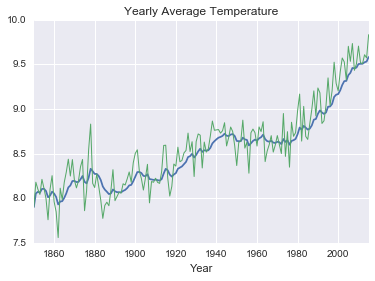

In [5]:
yearly_temp = globalTemp.groupby(globalTemp.dt.dt.year).mean().reset_index()

##I want to do a linear_model for this data. This is using Scikit-learn Linear Regression 
##Makes a linear model for the temperature data only.

##Function to make a linear model out of the current data, returns a linear model for prediction
def makeLinearModel(x_data, y_data, nameOfModel):
    x_test  = x_data[1::2]
    x_train = x_data[::2]
    y_test  = y_data[1::2]
    y_train = y_data[::2]
    regr = linear_model.LinearRegression()
    regr.fit(x_train.to_frame(), y_train.to_frame())
    print("The linear model for:  ", nameOfModel,'\n')
    print("Coefficients:  ", regr.coef_)
    print("Mean Squared error : %.2f" % np.mean((regr.predict(x_test.to_frame())- y_test.to_frame()) **2))
    print("Variance score: %.2f" % regr.score(x_test.to_frame(), y_test.to_frame()))
    return regr
    
regr = makeLinearModel(yearly_temp.dt, yearly_temp.LandAverageTemperature, "GlobalTemperature")

##Error values help to make the validation of the model.

#get slope of graph to have mathematical value for the increase in temperature over the years.
#The ability to get the slope and intercept gives me the first equation in a system of equations for predicting
#The future temperatures.

yearly_temp = globalTemp.groupby(globalTemp.dt.dt.year).mean()
pd.Series.ewm(yearly_temp.LandAverageTemperature, 5).mean().plot()
yearly_temp.LandAverageTemperature.plot(linewidth=1)
plt.title("Yearly Average Temperature")
plt.xlabel("Year")

#However, linear models aren't enough. What I want to do is combine all of the data together, GDP, malaria incidence, 
#temperature and population and develop a model that might be able to predict future outbreaks based upon these factors



The linear model for:   US Yearly Temperature 

Coefficients:   [[ 0.12606528]]
Mean Squared error : 0.31
Variance score: -0.26


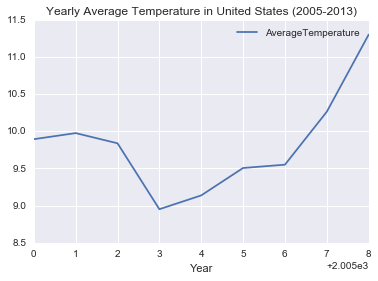

In [6]:
#USA yearly temp 
yearly_temp_US = globalTempbyCountry[globalTempbyCountry.Country == 'United States']
yearly_temp_US = yearly_temp_US.groupby(yearly_temp_US.dt.dt.year).mean().reset_index()
yearly_temp_US = yearly_temp_US[yearly_temp_US.dt >= 2005]
yearly_temp_US.plot(x='dt', y='AverageTemperature')
plt.title("Yearly Average Temperature in United States (2005-2013)")
plt.xlabel("Year")

US_model = makeLinearModel(yearly_temp_US.dt, yearly_temp_US.AverageTemperature, "US Yearly Temperature")
#The short span of data within this US_temperature data makes the mean squared error a bit higher

In [7]:
#Lyme Disease, a vector borne illness, by year and incidence in the United States of America from 2005-2015.
lymetotals = pd.read_csv('lymeperyear.csv')
lymeincidence = pd.read_csv('lymeincidence.csv')

The correlation Coefficient between Lyme Disease and Temperature in the USA is  -0.252319278183


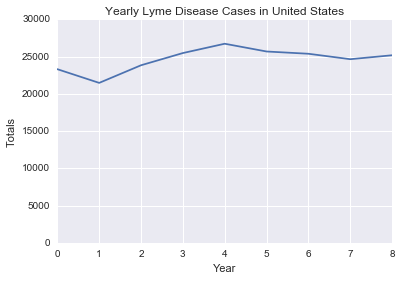

In [8]:
lyme_groupby= lymetotals.groupby('Year').mean().reset_index()
lyme_groupby = lyme_groupby[lyme_groupby['Year'] <=2013]
f = plt.subplots(1)
pd.Series.ewm(lyme_groupby.totals, 5).mean().plot()
plt.title("Yearly Lyme Disease Cases in United States")
plt.xlabel("Year")
plt.ylim(ymin = 0, ymax = max(lyme_groupby.totals))
plt.ylabel("Totals")
##In order to calculate correlation coefficient, we need to have exact dimensions. Therefore 
#everything must be the same dimensions. Need to change  the data for this reason.
corCoef = np.corrcoef(yearly_temp_US.AverageTemperature, lyme_groupby.totals )[0,1]
print("The correlation Coefficient between Lyme Disease and Temperature in the USA is " , corCoef)

##In this we see that the correlation coefficient is -0.25231927... Since the correlation is negative, it means that there 
#is a slight correlation that while one increases/decreases, the other one decreases/increases. Since the absolute value
#of the correlation is closer to 0 than to 1, it means the correlation is a weak one. However, with more data, I may 
#get a different result because this data is a small set.


##So much volatility in the data, that this is definitely not a linear dataset. It seems to have no significant pattern.

The correlation coefficient for incidence of lyme in the USA and temperature is  -0.32177780628


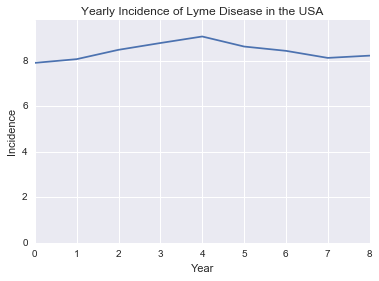

In [9]:
#Plots for the lyme incidence by year in the US 
#The incidence is a different calculation for the frequency of the disease, without knowing
#just the occurrences. (Just here for representation)
lymeinc_groupby = lymeincidence.groupby('year').mean().reset_index()
lymeinc_groupby = lymeinc_groupby[lymeinc_groupby['year'] <=2013]
pd.Series.ewm(lymeinc_groupby.incidence,5).mean().plot()
plt.ylim(ymin = 0, ymax = max(lymeinc_groupby.incidence))
plt.title("Yearly Incidence of Lyme Disease in the USA")
plt.xlabel("Year")
plt.ylabel("Incidence")

corrCoef2 = np.corrcoef(yearly_temp_US.AverageTemperature, lymeinc_groupby.incidence )[0,1]
print("The correlation coefficient for incidence of lyme in the USA and temperature is ", corrCoef2)
##A similar story to the number of occurrences in the US. The corrCoef is a weak and negative correlation.

In [10]:
#Now, since linear models are not enough for this project, I have put together several factors to evaluate this with,
#including temperature, population, GDP and the lyme occurrences. This is to see if these three factors (temperature,
#population and GDP) can build a model to predict the lyme occurrences in the USA in the future.
lyme_groupby = lyme_groupby.rename(columns = {'Year':'dt'})
lyme_pop_gdp_US = pd.merge(lyme_groupby, USpopandGDP, how = 'inner', on = ['dt'])
lyme_pop_gdp_temp_us = pd.merge(lyme_pop_gdp_US, yearly_temp_US, how = 'inner', on = ['dt'])
lyme_pop_gdp_temp_us

,dt,totals,population,GDP,AverageTemperature,AverageTemperatureUncertainty
0,2007,27444,301231207,48061.5377,9.837500,0.142000
1,2008,28921,304093966,48401.4273,8.951417,0.143250
2,2009,29959,306771529,47001.5553,9.137083,0.164667
3,2010,22561,309346863,48374.0868,9.505583,0.155083
4,2011,24364,311718857,49781.8007,9.549917,0.173083
5,2012,22014,314102623,51433.0471,10.261083,0.215500
6,2013,27203,316427395,52749.9112,11.297111,0.318778


In [12]:
#Now that we have all the data we want in one table, we can separate the xs and the y for the ability to train 
#a model for this particular data.
#x values are going to be an np-array of the population, temperature, and the GDP of the USA in this time period
#y values are the totals of the lyme disease in this time-frame
#One thing that was difficult with this was the amount of data, there was not a lot of data once everything was combined
#so the model may not work very well at all. I think there needs to be a way more significant amount
#Of data to get an accurate result.
X_values_us_lyme = np.array(list(zip(lyme_pop_gdp_temp_us['population'], lyme_pop_gdp_temp_us['GDP'], lyme_pop_gdp_temp_us['AverageTemperature'])))
Y_values_us_lyme = lyme_pop_gdp_temp_us['totals']

In [13]:
##Now I want to look at Malaria in a few select countries, starting with Angola (The countries are selected based on
#the data found on WHO). There is not Malaria data for every country.

In [14]:

angolaTemps = globalTempbyCountry[globalTempbyCountry.Country == 'Angola']

In [15]:

angolaGroupedTemps = angolaTemps.groupby(angolaTemps.dt.dt.year).mean().reset_index()
angolaGroupedTemps = angolaGroupedTemps[angolaGroupedTemps.dt >= 2005]
angolaGroupedTemps


,dt,AverageTemperature,AverageTemperatureUncertainty
138,2005,22.966083,0.827083
139,2006,21.947083,0.733500
140,2007,22.427083,0.739250
141,2008,22.287333,0.647750
142,2009,22.316500,0.688167
143,2010,22.681500,0.671333
144,2011,22.029667,0.771750
145,2012,22.123333,0.786333
146,2013,22.507875,1.035250


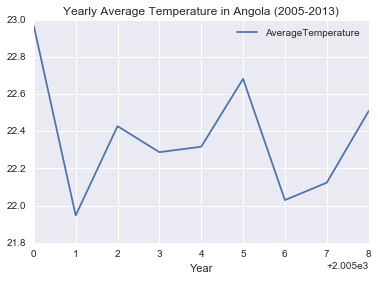

In [16]:
angolaGroupedTemps.plot(x='dt', y='AverageTemperature')
plt.title("Yearly Average Temperature in Angola (2005-2013)")
plt.xlabel("Year")

#For some reason no matter what I performed on this, it would continue to show "year" as 0-8. I spent over an hour doing
#this and researching how to fix it. Nothing worked, so I apologize for the wonky x-axis values.

The linear model for:   Angola Malaria 

Coefficients:   [[ 115969.45]]
Mean Squared error : 38446889611.71
Variance score: 0.19


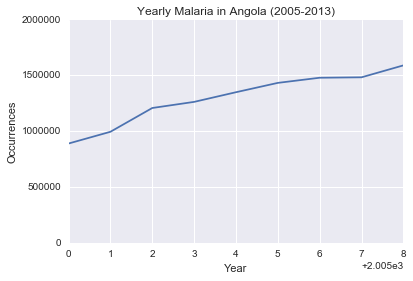

In [17]:
##Now in order for this temperature data to be worth anything, we need to graph the Malaria data as well. 
malariaperYearAngola = pd.read_csv('yearlyAngolaMalaria.csv')
angolaMalaria_groupby = malariaperYearAngola.groupby('year').mean()
pd.Series.ewm(angolaMalaria_groupby.malariaOccurrence, 5).mean().plot()
plt.title("Yearly Malaria in Angola (2005-2013)")
plt.ylim(ymin=0, ymax = max(angolaMalaria_groupby.malariaOccurrence))
plt.xlabel("Year")
plt.ylabel("Occurrences")
AngolaMalariaModel = makeLinearModel(malariaperYearAngola.year, malariaperYearAngola.malariaOccurrence, "Angola Malaria")
angolaMalaria_groupby = angolaMalaria_groupby.reset_index()
##The malaria for Angola is not a linear model, as can be seen in its error.

In [38]:
#Now to combine all of the data again, as was done before.
angolapopandGDP = angolapopandGDP.rename(columns = {'dt': 'year'})

angola_pop_gdp_mal = pd.merge(angolaMalaria_groupby, angolapopandGDP, how = 'inner', on = ['year'])
angola_pop_gdp_mal = angola_pop_gdp_mal.rename(columns = {'year': 'dt'})
angola_pop_gdp_mal_temp = pd.merge(angola_pop_gdp_mal, angolaGroupedTemps, how = 'inner', on = ['dt'])
angola_pop_gdp_mal_temp.head()
X_values_ang_mal = np.array(list(zip(angola_pop_gdp_mal_temp['population'],angola_pop_gdp_mal_temp['GDP'], angola_pop_gdp_mal_temp['AverageTemperature'])))
Y_values_ang_mal = angola_pop_gdp_mal_temp['malariaOccurrence']

In [39]:
##Now that I have all the data together, I can build a model for this data as well.


In [40]:
#Now we want to do Zimbabwe yearly temperatures for all data, then I will do it for the years that we have
#Malaria data for, for fair comparison/correlation. 

zimbabweTemps = globalTempbyCountry[globalTempbyCountry.Country == 'Zimbabwe']
zimbabweGroupedTemps = zimbabweTemps.groupby(zimbabweTemps.dt.dt.year).mean().reset_index()
zimbabweGroupedTemps = zimbabweGroupedTemps[zimbabweGroupedTemps.dt >= 2007]


zimbabweGroupedTemps
ZimbabweTempModel = makeLinearModel(zimbabweGroupedTemps.dt, zimbabweGroupedTemps.AverageTemperature, "Zimbabwe Yearly Temperature")

The linear model for:   Zimbabwe Yearly Temperature 

Coefficients:   [[-0.12276667]]
Mean Squared error : 0.21
Variance score: -3.64


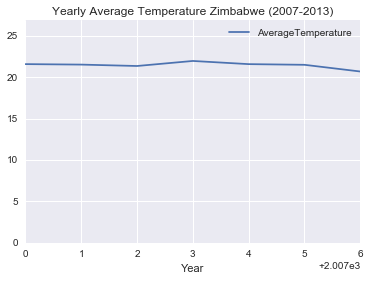

In [21]:
#Temperature data for Zimbabwe

zimbabweGroupedTemps.plot(x='dt', y='AverageTemperature')
malariaperYearZimbabwe = pd.read_csv('yearlyZimbabweMalaria.csv')
zimbabweMalaria_groupby = malariaperYearZimbabwe.groupby('year').mean()
plt.ylim(ymin = 0, ymax = max(zimbabweGroupedTemps['AverageTemperature']) + 5)
plt.title("Yearly Average Temperature Zimbabwe (2007-2013)")
plt.xlabel("Year")


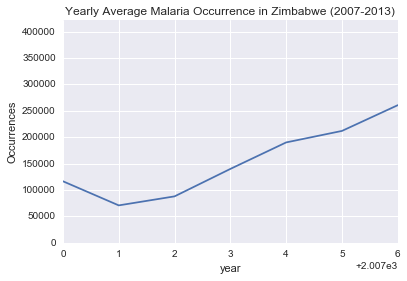

In [22]:

pd.Series.ewm((zimbabweMalaria_groupby.malariaOccurrence), 5).mean().plot()
plt.ylim(ymin = 0, ymax = max(zimbabweMalaria_groupby.malariaOccurrence))
plt.title("Yearly Average Malaria Occurrence in Zimbabwe (2007-2013)")
plt.xlabel("year")
plt.ylabel("Occurrences")
zimbabweMalaria_groupby=zimbabweMalaria_groupby.reset_index()

In [23]:
#Now that it can be seen this isn't a linear model, I will put together all the data as I did with the other ones.
zimbabweMalaria_groupby=zimbabweMalaria_groupby.rename(columns = {'year':'dt'})
zimbabweTotal = pd.merge(zimbabweMalaria_groupby, zimbabwepopandGDP, how = 'inner', on = ['dt'])
zimbabweTotal = pd.merge(zimbabweTotal, zimbabweGroupedTemps, how = 'inner', on = ['dt'])

zimbabweTotal.head()
X_values_zim_mal = np.array(list(zip(zimbabweTotal['population'],zimbabweTotal['GDP'], zimbabweTotal['AverageTemperature'])))
Y_values_zim_mal = zimbabweTotal['malariaOccurrence']

In [24]:
#Now temperatures for uganda to study against Malaria
ugandaTemps = globalTempbyCountry[globalTempbyCountry.Country == 'Uganda']
ugandaGroupedTemps = ugandaTemps.groupby(ugandaTemps.dt.dt.year).mean().reset_index()
ugandaGroupedTemps = ugandaGroupedTemps[ugandaGroupedTemps.dt >= 2002]

UgandaTempModel = makeLinearModel(ugandaGroupedTemps.dt, ugandaGroupedTemps.AverageTemperature, "Uganda Yearly Temperature")
##Uganda's temperature data has very linear data with a mean squared error of 5%

The linear model for:   Uganda Yearly Temperature 

Coefficients:   [[-0.00095357]]
Mean Squared error : 0.05
Variance score: -0.20


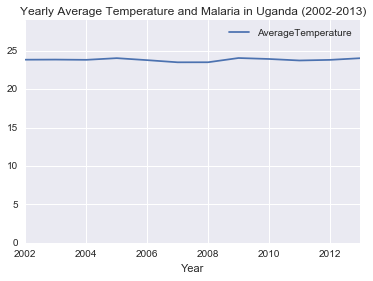

In [25]:
ugandaGroupedTemps.plot(x='dt', y='AverageTemperature')
#have to set the y limit on graphs to give the real picture. If you just leave the graphs as is, it makes the 
#temperature changes look much more drastic
plt.ylim(ymin = 0, ymax = max(ugandaGroupedTemps['AverageTemperature'] + 5))
plt.title("Yearly Average Temperature and Malaria in Uganda (2002-2013)")
plt.xlabel("Year")

The linear model for:   Uganda Yearly Malaria 

Coefficients:   [[ 182053.98571429]]
Mean Squared error : 674001866905.37
Variance score: -3.10


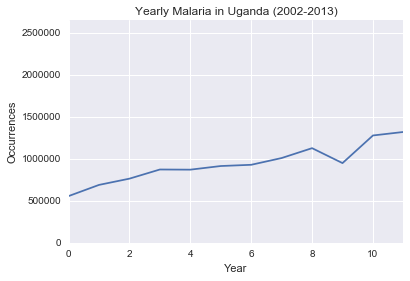

In [26]:
##Now in order for this temperature data to be worth anything, we need to graph the Malaria data as well. 
malariaperYearUganda = pd.read_csv('yearlyUgandaMalaria.csv')
ugandaMalaria_groupby = malariaperYearUganda.groupby('year').mean().reset_index()
ugandaMalariaModel = makeLinearModel(ugandaMalaria_groupby.year, ugandaMalaria_groupby.malariaOccurrence, "Uganda Yearly Malaria")
pd.Series.ewm(ugandaMalaria_groupby.malariaOccurrence, 5).mean().plot()
plt.ylim(ymin =0 , ymax = max(ugandaMalaria_groupby.malariaOccurrence))
plt.title("Yearly Malaria in Uganda (2002-2013)")
plt.xlabel("Year")
plt.ylabel("Occurrences")

##Once again we can see the Malaria data does not follow a Linear Model.

In [27]:
#So once again, to make a good model, I will combine all of the facotrs for Uganda and then create a model using this 
#multi-variate data
ugandaMalaria_groupby = ugandaMalaria_groupby.rename(columns = {'year': 'dt'})
ugandaTotals = pd.merge(ugandaMalaria_groupby, ugandaGroupedTemps, how = 'inner', on = ['dt'])
ugandaTotals = pd.merge(ugandaTotals, ugandapopandGDP, how = 'inner', on = ['dt'])
ugandaTotals
X_values_uga_mal = np.array(list(zip(ugandaTotals['population'],ugandaTotals['GDP'], ugandaTotals['AverageTemperature'])))
Y_values_uga_mal = ugandaTotals['malariaOccurrence']

The linear model for:   Brazil Yearly Temperature 

Coefficients:   [[ 0.00793948]]
Mean Squared error : 0.08
Variance score: 0.70


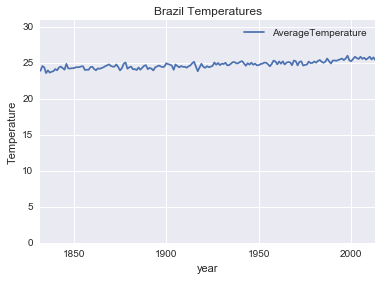

In [28]:
#Now temperatures for Brazil to study against Malaria
brazilTemps = globalTempbyCountry[globalTempbyCountry.Country == 'Brazil']
brazilGroupedTemps = brazilTemps.groupby(brazilTemps.dt.dt.year).mean().reset_index()
brazilGroupedTemps.plot(x='dt', y='AverageTemperature')
plt.ylim(ymin = 0 , ymax = max(brazilGroupedTemps['AverageTemperature'])+ 5)
plt.xlabel("year")
plt.ylabel("Temperature")
plt.title("Brazil Temperatures")
makeLinearModel(brazilGroupedTemps.dt,brazilGroupedTemps.AverageTemperature , "Brazil Yearly Temperature")

brazilGroupedTemps = brazilGroupedTemps[brazilGroupedTemps.dt >= 2000]


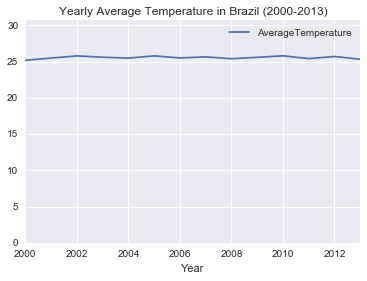

In [29]:
brazilGroupedTemps.plot(x='dt', y='AverageTemperature')
plt.ylim(ymin = 0, ymax = max(brazilGroupedTemps['AverageTemperature'])+5)
plt.title("Yearly Average Temperature in Brazil (2000-2013)")
plt.xlabel("Year")
#Brazil had virtually no slope changes in 2000-2012

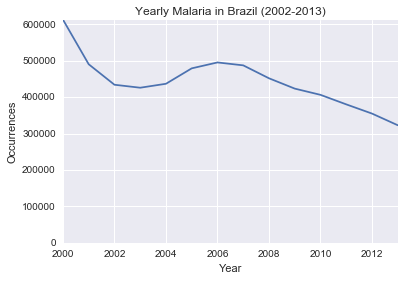

In [30]:
##Now in order for this temperature data to be worth anything, we need to graph the Malaria data as well. 
malariaperYearBrazil = pd.read_csv('yearlyBrazilMalaria.csv')
brazilMalaria_groupby = malariaperYearBrazil.groupby('year').mean()
pd.Series.ewm(brazilMalaria_groupby.occurrence, 5).mean().plot()
plt.ylim(ymin = 0, ymax = max(brazilMalaria_groupby.occurrence))
plt.title("Yearly Malaria in Brazil (2002-2013)")
plt.xlabel("Year")
plt.ylabel("Occurrences")
brazilMalaria_groupby = brazilMalaria_groupby.reset_index()


In [31]:
#Once again will add the other data all into a single dataframe to be able to use it to generate a model for malaria in this
#country
brazilMalaria_groupby = brazilMalaria_groupby.rename(columns = {'year': 'dt'})
brazilTotals = pd.merge(brazilMalaria_groupby, brazilGroupedTemps, how = 'inner', on = ['dt'])
brazilTotals = pd.merge(brazilTotals, brazilpopandGDP, how = 'inner', on = ['dt'])
brazilTotals.head()
X_values_bra_mal = np.array(list(zip(brazilTotals['population'], brazilTotals['GDP'], brazilTotals['AverageTemperature'])))
Y_values_bra_mal = brazilTotals['occurrence']

The linear model for:   Cholera Yearly Occurrences 

Coefficients:   [[-142.49623855]]
Mean Squared error : 19183015.99
Variance score: 0.20


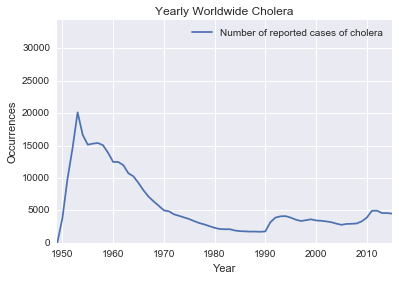

In [32]:
##Worldwide Cholera Per Year, maybe not the most effective way of looking at Cholera
##Since it is only experienced in a small amount of countries. 
choleraPerYear = choleraData.groupby('Year').mean()
pd.Series.ewm(choleraPerYear, 5).mean().plot()

plt.ylim(ymin = 0, ymax = max(choleraPerYear['Number of reported cases of cholera']))
plt.title("Yearly Worldwide Cholera")
plt.xlabel("Year")
plt.ylabel("Occurrences")
choleraPerYear2 = choleraData.groupby('Year').mean().reset_index()
choleraModel= makeLinearModel(choleraPerYear2.Year, choleraPerYear2['Number of reported cases of cholera'], "Cholera Yearly Occurrences")

#As seen with the diseases before it, this is also NOT a linear model. It looks like a hyperbolic curve

In [33]:
choleraPerCountry = choleraData.groupby('Country')
#choleraPerCountry.head()
#When the data is grouped by country, you can see the large discrepancy between countries. 
#This is why the data was chosen for four specific countries, due to historical data
#that those countries are impacted: Zimbabwe, Angola,and Uganda
#The overlap between these countries for Malaria and Cholera also allows us a secondary comparison
#Whether a water related illness (Choldera) or a Vector Borne Illness (Malaria) is ore impacted.
#However, this is an aside and is not the actual mission of this project.

The linear model for:   Yearly Zimbabwe Temp 

Coefficients:   [[ 0.0212735]]
Mean Squared error : 0.23
Variance score: 0.04


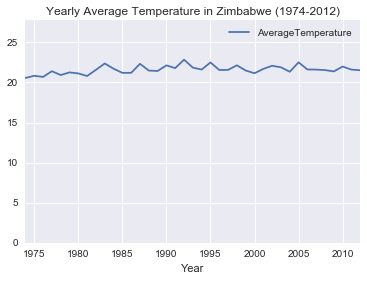

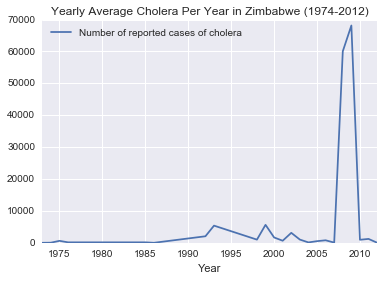

In [34]:
yearly_temp_Zimbabwe = globalTempbyCountry[globalTempbyCountry.Country == 'Zimbabwe']
yearly_temp_Zimbabwe = yearly_temp_Zimbabwe.groupby(yearly_temp_Zimbabwe.dt.dt.year).mean().reset_index()
yearly_temp_Zimbabwe = yearly_temp_Zimbabwe[yearly_temp_Zimbabwe.dt >= 1974] 
yearly_temp_Zimbabwe = yearly_temp_Zimbabwe[yearly_temp_Zimbabwe.dt <= 2012]
yearly_temp_Zimbabwe.plot(x='dt', y='AverageTemperature')
plt.ylim(ymin = 0, ymax = max(yearly_temp_Zimbabwe['AverageTemperature']) +5)
plt.title("Yearly Average Temperature in Zimbabwe (1974-2012)")
plt.xlabel("Year")

choleraZimbabwe= choleraData[choleraData.Country == 'Zimbabwe'][::-1]
choleraZimbabwe = choleraZimbabwe[choleraZimbabwe['Year'] <=2012]

choleraZimbabwe.plot(x = 'Year')
plt.title ("Yearly Average Cholera Per Year in Zimbabwe (1974-2012)")

ZimbabweTempModel= makeLinearModel(yearly_temp_Zimbabwe.dt, yearly_temp_Zimbabwe.AverageTemperature, "Yearly Zimbabwe Temp")


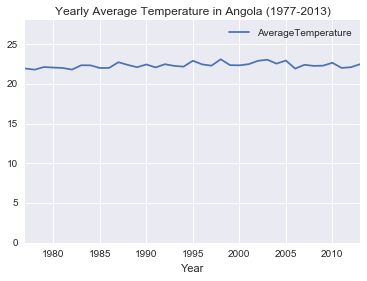

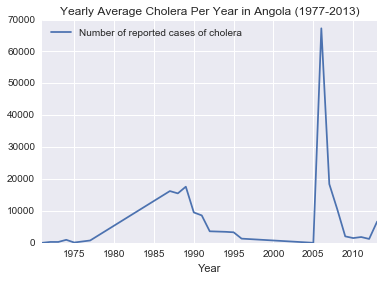

In [35]:
yearly_temp_Angola2 = globalTempbyCountry[globalTempbyCountry.Country == 'Angola']
yearly_temp_Angola2 = yearly_temp_Angola2.groupby(yearly_temp_Angola2.dt.dt.year).mean().reset_index()
yearly_temp_Angola2 = yearly_temp_Angola2[yearly_temp_Angola2.dt >= 1977] 
yearly_temp_Angola2 = yearly_temp_Angola2[yearly_temp_Angola2.dt <= 2013]
yearly_temp_Angola2.plot(x='dt', y='AverageTemperature')
plt.ylim(ymin = 0, ymax= max(yearly_temp_Angola2['AverageTemperature'])+5)
plt.title("Yearly Average Temperature in Angola (1977-2013)")
plt.xlabel("Year")

choleraAngola= choleraData[choleraData.Country == 'Angola'][::-1]
choleraAngola = choleraAngola[choleraAngola['Year'] <=2013]
choleraAngola.plot(x = 'Year')
plt.title ("Yearly Average Cholera Per Year in Angola (1977-2013)")



The equation for the temperature graph is :  y=  1.37342104406 x +  -7.27685895333
The linear model for:   Yearly Cholera Uganda 

Coefficients:   [[ 72.94205887]]
Mean Squared error : 159024847.78
Variance score: -0.04


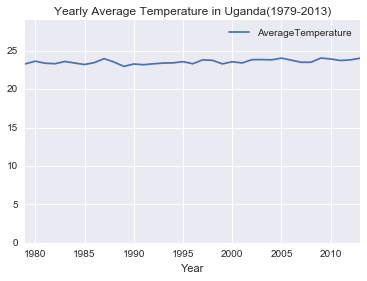

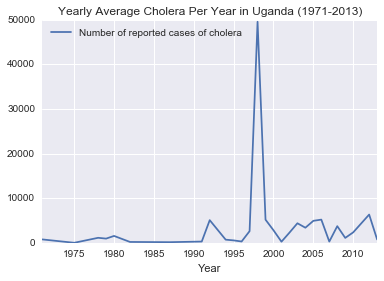

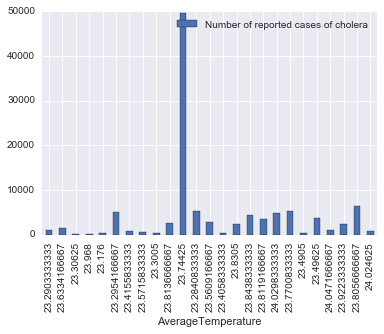

In [36]:
yearly_temp_Uganda2 = globalTempbyCountry[globalTempbyCountry.Country == 'Uganda']
yearly_temp_Uganda2 = yearly_temp_Uganda2.groupby(yearly_temp_Uganda2.dt.dt.year).mean().reset_index()

yearly_temp_Uganda2 = yearly_temp_Uganda2[yearly_temp_Uganda2.dt >= 1979] 
yearly_temp_Uganda2 = yearly_temp_Uganda2[yearly_temp_Uganda2.dt <= 2013]
yearly_temp_Uganda2.plot(x='dt', y='AverageTemperature')

ugandaSlope, ugandaIntercept = np.polyfit(np.log(yearly_temp_Uganda2.dt), np.log(yearly_temp_Uganda2.AverageTemperature), 1)
plt.ylim(ymin=0, ymax = max(yearly_temp_Uganda2['AverageTemperature'])+5)
plt.title("Yearly Average Temperature in Uganda(1979-2013)")
plt.xlabel("Year")
print("The equation for the temperature graph is :  y= ", ugandaSlope , "x + " , ugandaIntercept)

choleraUganda= choleraData[choleraData.Country == 'Uganda'][::-1]
choleraUganda = choleraUganda[choleraUganda['Year'] <=2013]
choleraUganda.plot(x = 'Year')

plt.title ("Yearly Average Cholera Per Year in Uganda (1971-2013)")

#Rename the year to dt to match the other dataframe so I can combine against the dt to 
#get data from both temperature and cholera in the same dataframe.
choleraUganda = choleraUganda.rename(columns={'Year': 'dt'})

choleraAndTemp = pd.merge(yearly_temp_Uganda2, choleraUganda, how='inner', on=['dt'])
choleraAndTemp.groupby('AverageTemperature')
#Average Temperature vs. Number of Reported Cases of Cholera Per Year 
#Trying to see a trend in the temperatures, but as we can see there really is no trend
choleraAndTemp.plot(x = 'AverageTemperature', y = 'Number of reported cases of cholera', kind = 'bar')
CholeraUgandaModel= makeLinearModel(choleraUganda['dt'], choleraUganda['Number of reported cases of cholera'], "Yearly Cholera Uganda")


##Linear Model does NOT apply for the cholera data, once again.

#For these three countries, I am going to add cholera data to the three factors I already have, population, temp, and GDP
#This will be an alternate 'y' to the malaria data, because malaria and cholera are not being tested for a 
#relationship

#So, each of these datapoints for these countries will be added into the correct dataframes

In [41]:
choleraAngola = choleraAngola.rename(columns = {'Year':'dt'})
angola_pop_gdp_mal_temp = pd.merge(angola_pop_gdp_mal_temp, choleraAngola, how = 'inner', on =['dt'])
ugandaTotals = pd.merge(ugandaTotals, choleraUganda, how = 'inner', on = ['dt'])
choleraZimbabwe = choleraZimbabwe.rename(columns = {'Year': 'dt'})
zimbabweTotal = pd.merge(zimbabweTotal, choleraZimbabwe, how = 'inner', on =['dt'])




In [42]:
X_values_chol_ang = np.array(list((angola_pop_gdp_mal_temp['population'],angola_pop_gdp_mal_temp['GDP'], angola_pop_gdp_mal_temp['AverageTemperature'])))
Y_values_chol_ang = angola_pop_gdp_mal_temp['Number of reported cases of cholera']

X_values_chol_uga = np.array(list(zip(ugandaTotals['population'],ugandaTotals['GDP'], ugandaTotals['AverageTemperature'])))
Y_values_chol_uga = ugandaTotals['Number of reported cases of cholera']

X_values_chol_zim = np.array(list(zip(zimbabweTotal['population'],zimbabweTotal['GDP'], zimbabweTotal['AverageTemperature'])))
Y_values_chol_zim = zimbabweTotal['Number of reported cases of cholera']
ugandaTotals.head()



,dt,malariaOccurrence,AverageTemperature,AverageTemperatureUncertainty,population,GDP,Country,Number of reported cases of cholera
0,2007,1045378,23.490500,0.518500,29991958,1335.97902,Uganda,276
1,2008,979298,23.496250,0.414750,31014427,1431.99631,Uganda,3726
2,2009,1301337,24.047167,0.385667,32067125,1489.90442,Uganda,1095
3,2010,1581160,23.922333,0.376417,33149417,1541.64226,Uganda,2341
4,2012,2662258,23.805667,0.597000,35400620,1704.45553,Uganda,6326


In [58]:
##Pulled this plot from our class discussion/examples of clustering
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

colors = [[0.61960787, 0.00392157, 0.25882354, 1.],
[0.99346405, 0.74771243, 0.43529413, 1.],
[0.74771243, 0.89803922, 0.627451, 1.]]

def plot(X, labels):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)

    for p, lbl in zip(X, labels):
        if lbl == -1:
            c = 'k'
        else:
            c = colors[lbl]
            
        ax.scatter(p[0],p[1], color=c, s=100, edgecolors='k')
##The above code for plot and blobs was taken from the notes on clustering that was provided on blackboard,
##I, in no way, take any credit for it, I just wanted it to be able to represent my data.

from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
#Developing a model for the multi-variate data provided above
#First splitting it into train and test and then training a neural network to predict future values.
#The score of the validation is also returned once the training is complete.
def mlpmodel(x_values, y_value):
    x_train, x_test, y_train, y_test= train_test_split(x_values, y_value)
    model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes =(5,2), random_state =1)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(x_train.shape, x_test.shape)
    print("This model's score is " , score)
    return model
       

#Clearly this MLPmodel does not have the confidence that is good enough to be considered a good fit for this data. 
#I believe this neural network is not valid because of the small amount of data. Ideally, this would have a significant
#amount more of data, but in this case, the more data I added, the smaller the cross-over became.

def kmeansmodel(x_values, y_value):
    x_train, x_test, y_train, y_test= train_test_split(x_values, y_value)
    model = KMeans(n_clusters = 2)
    labels = model.fit_predict(x_train)
    plot(x_train, labels)
    return model


In [63]:
def meanShiftModel(x_values, y_value):
    x_train, x_test, y_train, y_test= train_test_split(x_values, y_value)
    model = MeanShift()
    labels = model.fit_predict(x_train)
    return model



In [47]:
def makeLinearModel2(x_data, y_data, nameOfModel):
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    print("The linear model for:  ", nameOfModel,'\n')
    print("Coefficients:  ", regr.coef_)
    print("Mean Squared error : %.2f" % np.mean((regr.predict(x_test)- y_test) **2))
    print("Variance score: %.2f" % regr.score(x_test, y_test))
    return regr

#Cholera tested on this model
cholzimnewLinearModel = makeLinearModel2(X_values_chol_zim, Y_values_chol_zim, "zimbabweCholera")
choluganewLinearModel = makeLinearModel2(X_values_chol_uga, Y_values_chol_uga, "CholeraUganda")
#cholangnewLinearModel = makeLinearModel2(X_values_chol_ang, Y_values_chol_ang, "CholeraAngola")

#malaria tested on this model
malariaAngola = makeLinearModel2(X_values_ang_mal, Y_values_ang_mal, "AngolaMalaria")
malariaZim = makeLinearModel2(X_values_zim_mal, Y_values_zim_mal, "ZimbabweMalaria")
malariaUganda = makeLinearModel2(X_values_uga_mal, Y_values_uga_mal, "UgandaMalaria")
malariaBrazil = makeLinearModel2(X_values_bra_mal, Y_values_bra_mal, "BrazilMalaria")
    
#LymediseaseUS    
lymeUSA = makeLinearModel2(X_values_us_lyme, Y_values_us_lyme, "USALymeDisease")
    
##AS can be seen by the following output, not one of these datasets fits this model.

The linear model for:   zimbabweCholera 

Coefficients:   [  3.09414471e-03  -1.67476302e+01  -5.53104787e+03]
Mean Squared error : 3457938736.25
Variance score: -209.92
The linear model for:   CholeraUganda 

Coefficients:   [ -7.38761895e-02   1.34210323e+03  -9.42383455e+04]
Mean Squared error : 2970070555.76
Variance score: -1756.44
The linear model for:   AngolaMalaria 

Coefficients:   [  9.25018311e-02   1.58202785e+02   4.34073670e+05]
Mean Squared error : 38363391960.80
Variance score: -95.21
The linear model for:   ZimbabweMalaria 

Coefficients:   [  1.08964608e-01   2.02277615e+02   1.69598023e+05]
Mean Squared error : 28334940630.67
Variance score: -9.75
The linear model for:   UgandaMalaria 

Coefficients:   [  1.83895804e+00  -3.02734516e+04  -3.76374162e+06]
Mean Squared error : 6011799749699.53
Variance score: -5506.12
The linear model for:   BrazilMalaria 

Coefficients:   [ -2.75416958e-02   4.80776703e+01   1.73463788e+05]
Mean Squared error : 2742341533.17
Variance

(5, 3) (2, 3)
This model's score is  0.0
(4, 3) (2, 3)
This model's score is  0.0
(5, 3) (2, 3)
This model's score is  0.0
(4, 3) (2, 3)
This model's score is  0.0
(6, 3) (2, 3)
This model's score is  0.0
(5, 3) (2, 3)
This model's score is  0.0


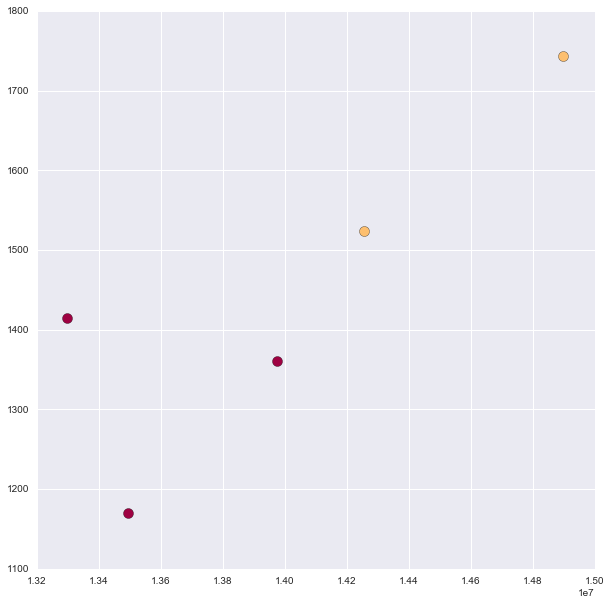

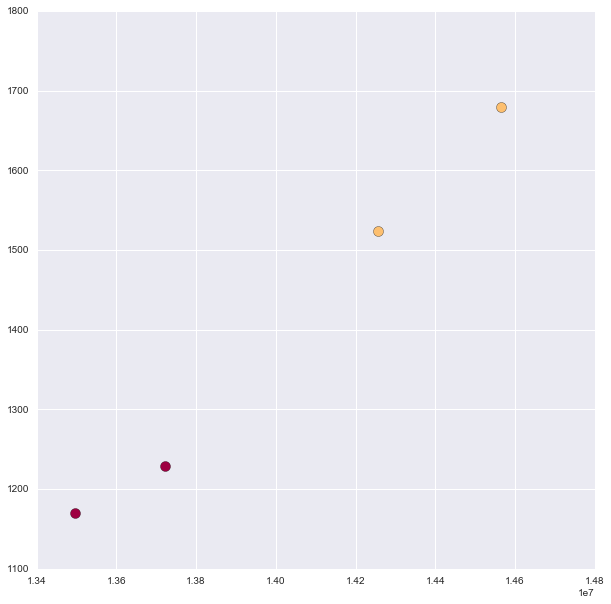

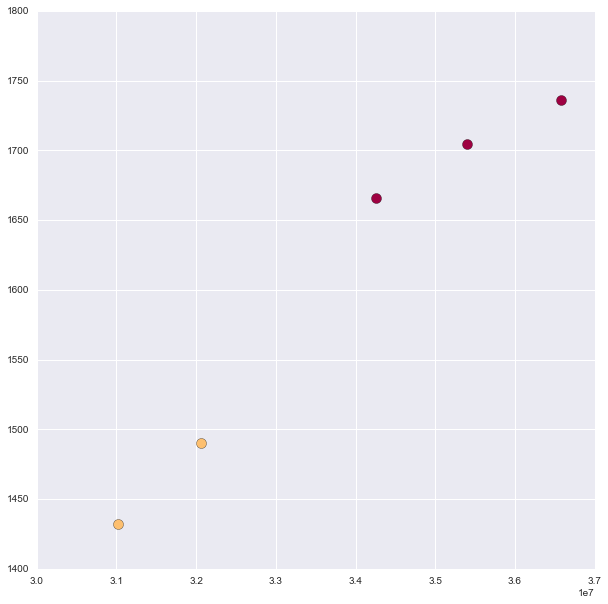

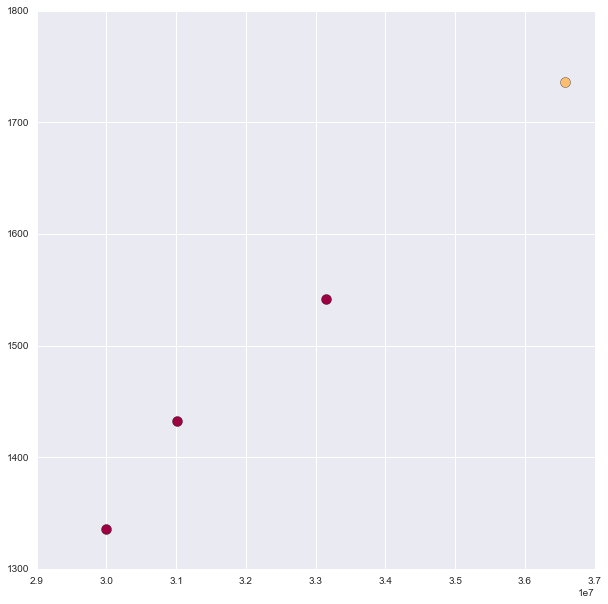

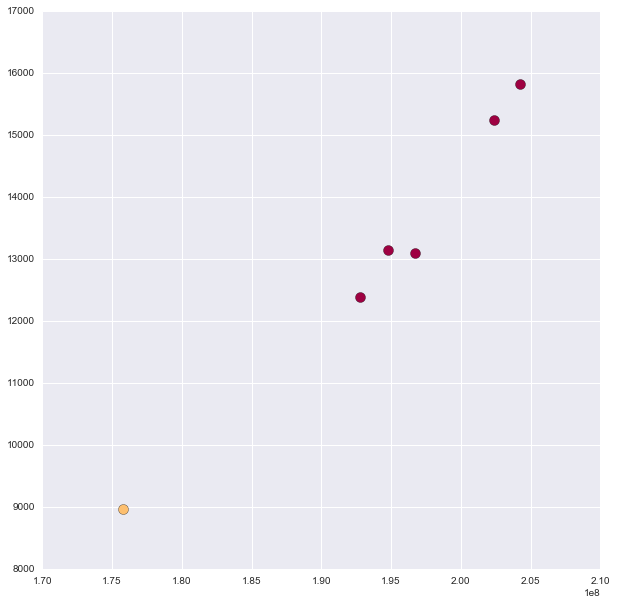

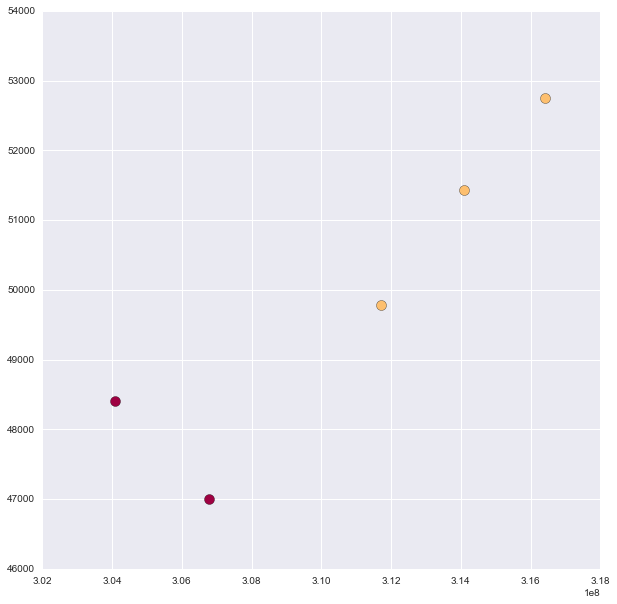

In [51]:
##Trying all of the datasets on the other models.

#The Angola data was very strange, so I omitted it from these trials.
#KMeans Model
kmeansmodelZimb = kmeansmodel(X_values_zim_mal, Y_values_zim_mal)
kmeansmodelZimbChol = kmeansmodel(X_values_chol_zim, Y_values_chol_zim)
#kmeansmodelAng = kmeansmodel(X_values_ang_mal, Y_values_ang_mal)
#kmeansmodelAngChol = kmeansmodel(X_values_chol_ang, Y_values_chol_ang)
kmeansmodelUga = kmeansmodel(X_values_uga_mal, Y_values_uga_mal)
kmeansmodelUgaChol = kmeansmodel(X_values_chol_uga, Y_values_chol_uga)
kmeansmodelBrazil = kmeansmodel(X_values_bra_mal, Y_values_bra_mal)
kmeansmodelUSlyme = kmeansmodel(X_values_us_lyme, Y_values_us_lyme)


#NeuralNetwork MLPclassifier model
mlpmodelZimb = mlpmodel(X_values_zim_mal, Y_values_zim_mal)
mlpmodelZimbChol = mlpmodel(X_values_chol_zim, Y_values_chol_zim)
#mlpmodelAng = mlpmodel(X_values_ang_mal, Y_values_ang_mal)
#mlpmodelAngChol = mlpmodel(X_values_chol_ang, Y_values_chol_ang)
mlpmodelUga = mlpmodel(X_values_uga_mal, Y_values_uga_mal)
mlpmodelUgaChol = mlpmodel(X_values_chol_uga, Y_values_chol_uga)
mlpmodelBraz = mlpmodel(X_values_bra_mal, Y_values_bra_mal)
mlpmodelUSLyme = mlpmodel(X_values_us_lyme, Y_values_us_lyme)

#These neural networks give a confidence score of 0.0, meaning there is virtually no fit.


In [57]:
from sklearn.model_selection import cross_val_score
#doing the cross validation on one of the models
crossValidationZimb = cross_val_score(kmeansmodelZimb,X_values_zim_mal, Y_values_zim_mal)

print("The cross validation score for ZimbabweMalaria Kmeans is " , crossValidationZimb)
#As can be seen by the printout, the scores are awful.
#The MLP model also gave a confidence score of 0.0, which basically means that there is NO fit.
#Both of these models, plus the linear model do not give any kind of indication that we can build a useful model 
#out of this data.


The cross validation score for ZimbabweMalaria Kmeans is  [ -1.20594961e+12  -4.46858439e+11  -8.16797746e+11]


In [ ]:
##Prediction Model:
##We want to take in a year (in the future, because otherwise we would just access data)
##and from this year, we want to return what the predicted temperature, and disease numbers will be for the countries 
##that were studied:
##United States, Angola, Zimbabwe, Uganda, Brazil and Democratic Republic of the Congo
##
##Parameters: a year, that is in the future from our data that we are looking to see what is going to occur.
##Returns: A chart of each country (of ones that have been studied), its temperature and disease predictions 
def predictions_for_year(year):
    
    print("The prediction for temperature in the year ", year, "around the globe is " ,  regr.predict(year).flatten())
    print("The prediction for temperature in the year ", year, "in The United States is " , US_model.predict(year).flatten())

predictions_for_year(2017)

In [ ]:
##Second Prediction Model:
##Instead of just a year, we can take in a range of years, and draw graphs to the corresponding data. 
##This will utilize the model above and fill an array with values to plot for each of this.
##
##Parameters: A range of years that we want to study
##Returns graphs of each of the studied countries and the predictions for those countries.
def predictions_for_a_range(range_years):
    
        #For each year, we calculate all of the following:
        #1. temperature in that year in global and each country studied (United States, Angola, Zimbabwe, Brazil, Uganda) 
        #2. predictions for each disease in said countries 
        #3. Return an array for each of these so we can have yearly data for each 
    yearly_data = []
    for year in range_years:
        yearly_data.append(regr.predict(year))
    return yearly_data

predictions_for_a_range(range(2017,2050, 2))

In [69]:
#MeanShift Model
meanShiftmodelZim = meanShiftModel(X_values_zim_mal, Y_values_zim_mal)
meanShiftmodelZimChol = meanShiftModel(X_values_chol_zim, Y_values_chol_zim)
#meanShiftmodelAng = meanShiftModel(X_values_ang_mal, Y_values_ang_mal)
#meanShiftmodelAngChol = meanShiftModel(X_values_chol_ang, Y_values_chol_ang)
meanShiftmodelUga = meanShiftModel(X_values_uga_mal, Y_values_uga_mal)
meanShiftmodelUgaChol = meanShiftModel(X_values_chol_uga, Y_values_chol_uga)
meanShiftmodelBrazil = meanShiftModel(X_values_bra_mal, Y_values_bra_mal)
meanShiftmodelUSA = meanShiftModel(X_values_us_lyme, Y_values_us_lyme)



<bound method MeanShift.predict of MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)>


In [ ]:
#Prediction multi-variate model for the malaria and the cholera
#After evaluating many models, there can be no real conclusion made.
#I think a lot of the places that this failed was that there was a small amount of data after combining all of the 
#data, and then on top of that, the data may not have been the contributing factors for these diseases
#As I had said in my previous presentation, I think this is a study that would have a very large amount of variables, 
#and could take decades to actually study
#ONe piece of data I would like to have is the funding that went into preventing these diseases, and if that amount
#correlated with the overall decline of these in the world as we know it today.

#If I was to restart this project, I would likely look at something more concrete, like heart disease or diabetes
#These two diseases have been studied and logged far more than cholera, malaria and lyme disease have
#In the case of malaria and cholera, I believe this is due to the region in which the diseases occur, as they do
#not have the resources to properly log every disease that breaks out.


